# Linked Lists

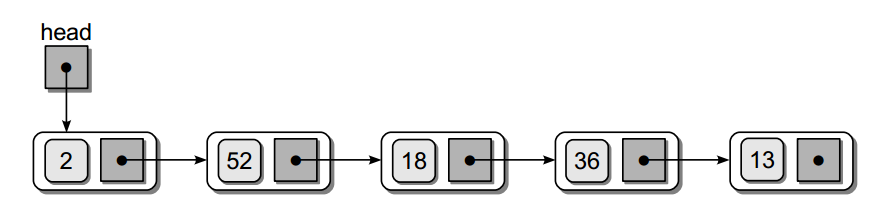

### Advantages of linked lists to lists: O(1) deletion and insertion
### Disadvantages: no random access
Random access in lists using index is O(1)

Linked lists can be singly or doubly linked and/or circular

Tail node has a null link. 

Linked lists are not provided by the standard library of Python.

In [1]:
class ListNode :
    def __init__( self, data ) :
        self.data = data
        self.next = None


More complex linked structures such as graphs:
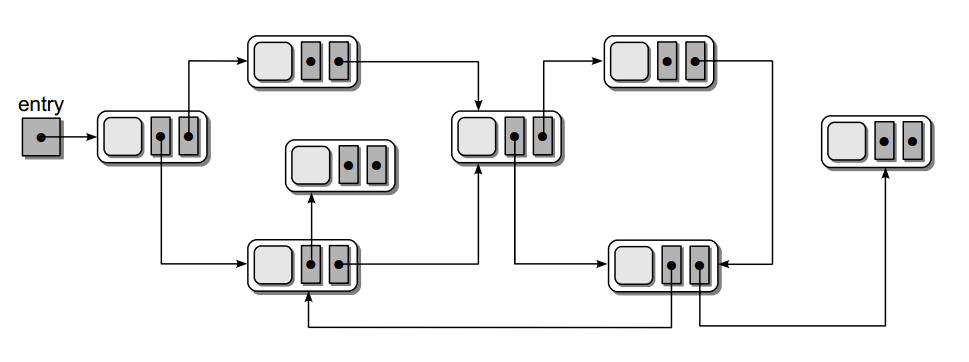


In [3]:
#Traversing the linked list
def traversal( head ):
     curNode = head
     while curNode is not None :
         print (curNode.data)
         curNode = curNode.next

In [4]:
# Searching for a node by value
def unorderedSearch( head, target ):
     curNode = head
     while curNode is not None and curNode.data != target :
         curNode= curNode.next
         
     return curNode is not None

In [5]:
# Prepending a node
#Adding a new node to the begining of the linked list is the easiest, because we have a head pointer
newNode = ListNode( item )
newNode.next = head
head = newNode

NameError: name 'item' is not defined

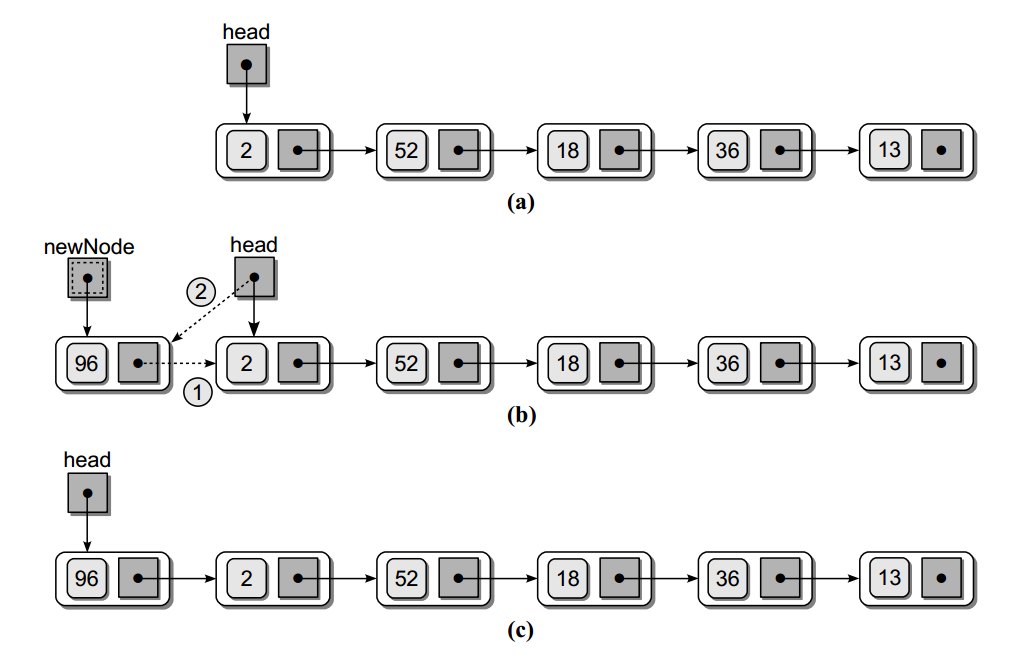

# Removing nodes by value
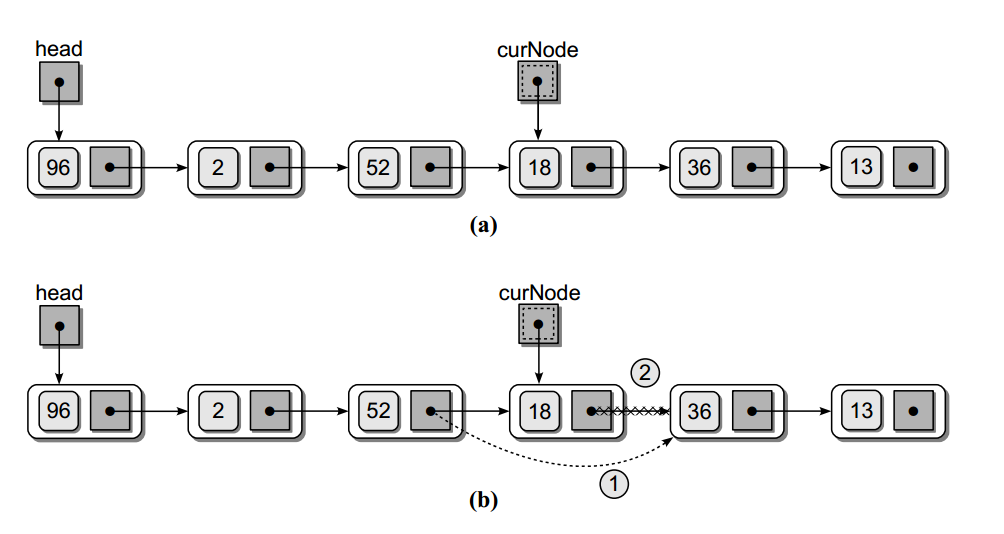

## Keping track of the previous element:
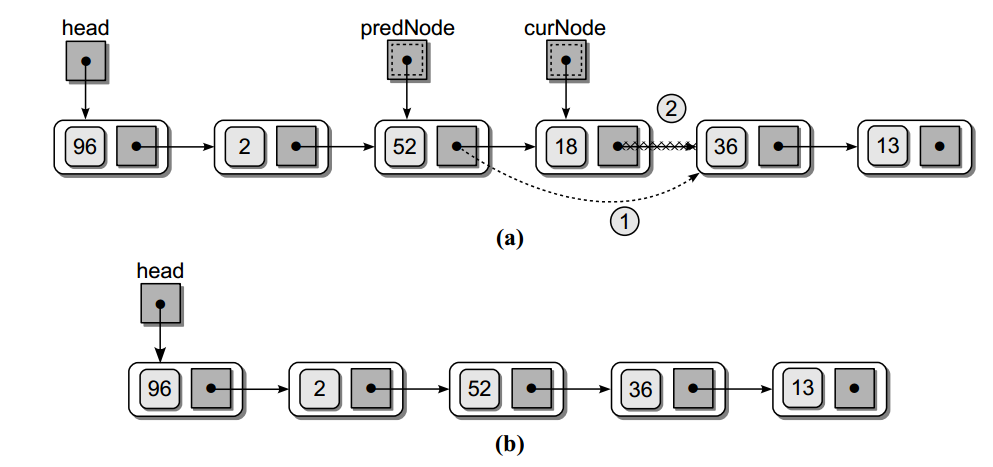

## Removing the first element
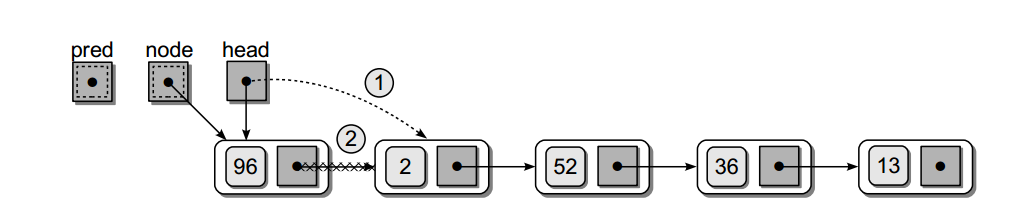

In [6]:
# Given the head reference, remove a target from a linked list.
predNode = None
curNode = head
while curNode is not None and curNode.data != target :
    predNode = curNode
    curNode = curNode.next 
if curNode is not None :
    if curNode is head :
        head = curNode.next #==head.next
        del curNode
    else :
        predNode.next = curNode.next
        del curNode


NameError: name 'head' is not defined

# Implementing the bag data structure using linked list
A bag is an unordered collection of items which may include duplicates

In [4]:
# Implements the Bag ADT using a singly linked list. 
class Bag :
     # Constructs an empty bag.
    def __init__( self ):
        self._head = None
        self._size = 0 

    # Returns the number of items in the bag.
    def __len__( self ):
        return self._size

    # Determines if an item is contained in the bag.
    def __contains__( self, target ):
        curNode = self._head
        while curNode is not None and curNode.item != target :
            curNode = curNode.next
        return curNode is not None

    # Adds a new item to the bag.
    def add( self, item ):
        newNode = _BagListNode( item )
        newNode.next = self._head
        self._head = newNode
        self._size += 1

    # Removes an instance of the item from the bag.
    def remove( self, item ):
        predNode = None
        curNode = self._head
        while curNode is not None and curNode.item != item :
            predNode = curNode
            curNode = curNode.next

        # The item has to be in the bag to remove it.
        assert curNode is not None, "The item must be in the bag."

        # Unlink the node and return the item.
        self._size -= 1
        if curNode is head :
            self._head = curNode.next
        else :
            predNode.next = curNode.next
        return curNode.item

    # Returns an iterator for traversing the list of items.
    def __iter__( self ):
        return _BagIterator( self._head )

 # Defines a private storage class for creating list nodes.
class _BagListNode( object ):
    def __init__( self, item ) :
        self.item = item
        self.next = None

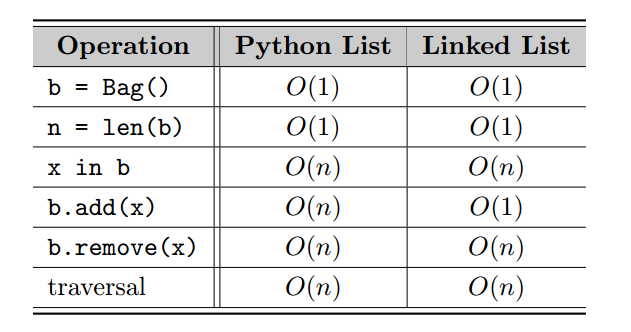

In [8]:
# Defines a linked list iterator for the Bag ADT.
class _BagIterator :
    def __init__( self, listHead ):
        self._curNode = listHead 
    def __iter__( self ):
        return self 
    def __next__( self ):
        if self._curNode is None :
            raise StopIteration
        else :
            item = self._curNode.item
            self._curNode = self._curNode.next
            return item


In [10]:
A=Bag()
A.add(32)
for x in A:
    print(x)

32


In [13]:
# Given the head and tail pointers, adds an item to a linked list.
newNode = ListNode( item )
if head is None :
    head = newNode
    tail=newNode
else :
    tail.next = newNode
    tail = newNode



NameError: name 'item' is not defined

In [14]:
# Given the head and tail references, removes a target from a linked list.
predNode = None
curNode = head
while curNode is not None and curNode.data != target :
    predNode = curNode
    curNode = curNode.next 
if curNode is not None :
    if curNode is head :
        head = curNode.next
    else :
        predNode.next = curNode.next
    
    if curNode is tail :
        tail = predNode


NameError: name 'head' is not defined

# Sorted linked lists

### Binary search on a linked list is not as efficient 

In [15]:
# Given the head pointer, insert a value into a sorted linked list.
# Find the insertion point for the new value.
predNode = None
curNode = head
while curNode is not None and value > curNode.data :
    predNode = curNode
    curNode = curNode.next 
# Create the new node for the new value.
newNode = ListNode( value )
newNode.next = curNode
# Link the new node into the list.
if curNode is head :
    head = newNode
else :
    predNode.next = newNode

NameError: name 'head' is not defined

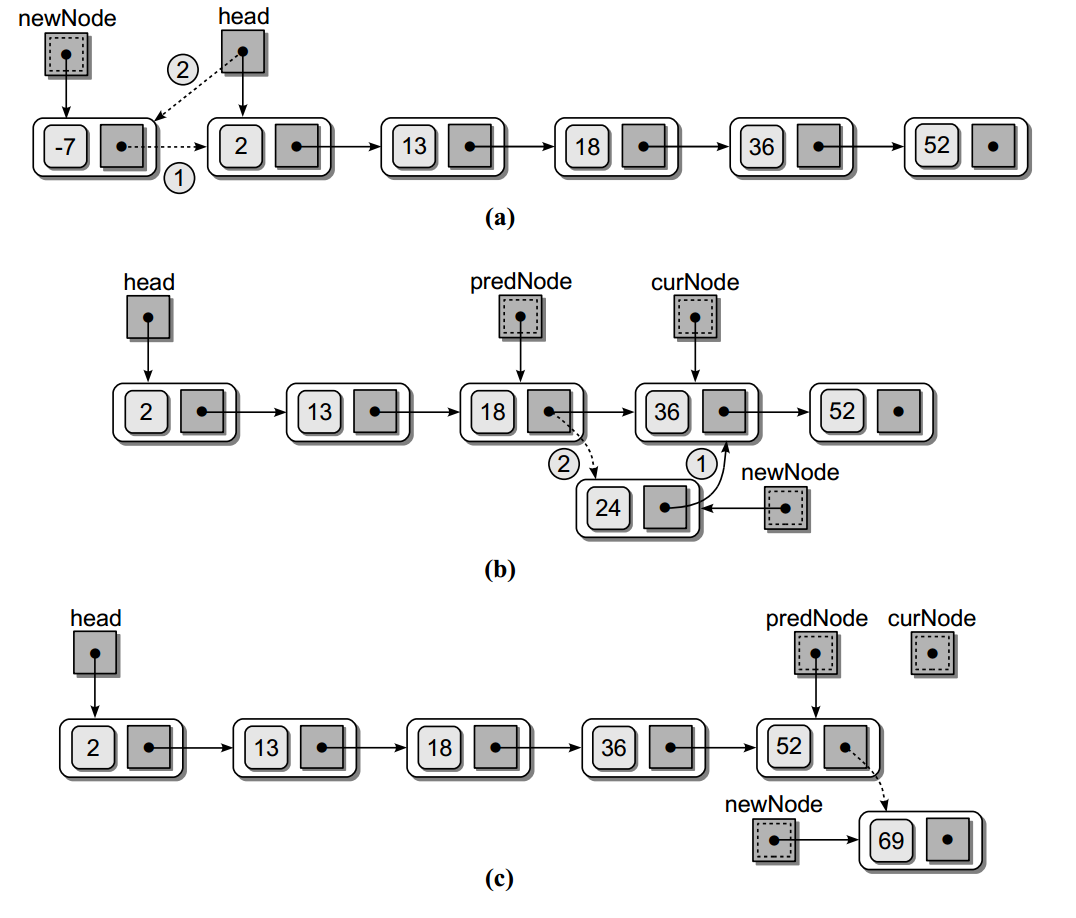

# Implementing sparse matrices using linked lists

We can use an array of sorted linked lists, one for each row of the matrix
Each linked list is sorted by column index

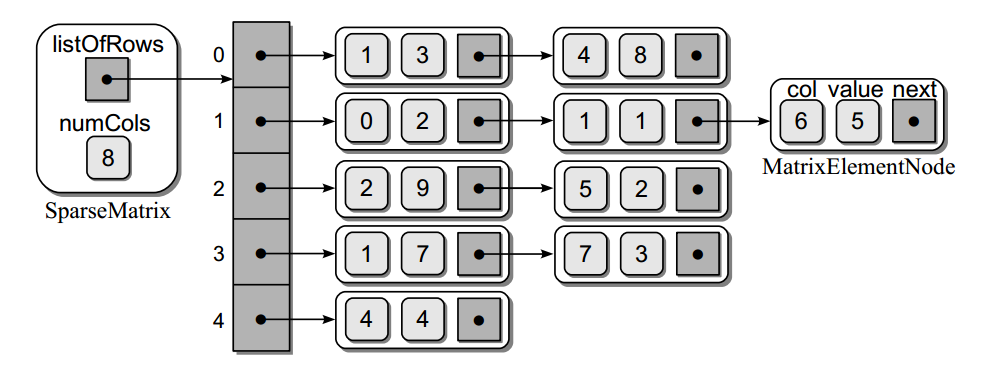

In [6]:
# Implementation of the Sparse Matrix ADT using an array of linked lists.
from array import *
class SparseMatrix :
    # Creates a sparse matrix of size numRows x numCols initialized to 0.
    def __init__( self, numRows, numCols ):
        self._numCols = numCols
        self._listOfRows = [None for i in range( numRows) ] #Array( numRows )

    # Returns the number of rows in the matrix.
    def numRows( self ):
        return len( self._listOfRows )

    # Returns the number of columns in the matrix.
    def numCols( self ):
        return self._numCols

    # Returns the value of element (i,j): x[i,j]
    def __getitem__( self, ndxTuple ):
        i,j=ndxTuple
        assert i>=0 and j>=0 and i<self.numRows() and j<self.numCols(), "Index out of range."

        row_head=self._listOfRows[i]
        curNode=row_head
        while(curNode!=None and curNode.col<j):
            curNode=curNode.next

        if curNode!=None and curNode.col==j:
            return curNode.value
        else:
            return 0    

   

    # Sets the value of element (i,j) to the value s: x[i,j] = s
    def __setitem__( self, ndxTuple, value ):
        
        row, col=ndxTuple
        assert row>=0 and col>=0 and row<self.numRows() and col<self.numCols(), "Index out of range."

        predNode = None
        #_listOfRows[row] is the head of the linked list for the row
        curNode = self._listOfRows[row]
        while curNode is not None and curNode.col < col :
            predNode = curNode
            curNode = curNode.next

        # See if the element is in the list.
        if curNode is not None and curNode.col == col :
            if value == 0.0 : # remove the node.
                if curNode == self._listOfRows[row] :
                    self._listOfRows[row] = curNode.next
                else :
                    predNode.next = curNode.next
            else : # change the node's value.
                curNode.value = value

        # Otherwise, the element is not in the list.
        elif value != 0.0 :
            newNode = _MatrixElementNode( col, value )
            newNode.next == curNode
            if curNode == self._listOfRows[row] :
                self._listOfRows[row] = newNode
            else :
                predNode.next = newNode

    # Scales the matrix by the given scalar.
    def scaleBy( self, scalar ):
        if scalar==0:
            for row in range( self.numRows() ):
                self._listOfRows[row]=None

        for row in range( self.numRows() ) :
            curNode = self._listOfRows[row]
            while curNode is not None :
                curNode.value *= scalar
                curNode = curNode.next

    # Creates and returns a new matrix that is the transpose of this matrix.
    def transpose( self ):

        newmatrix=SparseMatrix(self.numCols(), self.numRows())
        for i in range(self.numRows()):
            #for j in range(self.numCols()):
            #    newmatrix[j,i]=self[i,j]
            curnode=self._listOfRows[i]
            while(curnode!=None):
                newmatrix[curnode.col, i]=curnode.value
                curnode=curnode.next

        return newmatrix        



    # Matrix addition: newMatrix = self + rhsMatrix.
    def __add__( self, rhsMartrix ) :
        # Make sure the two matrices have the correct size.
        assert rhsMatrix.numRows() == self.numRows() and \
        rhsMatrix.numCols() == self.numCols(), \
        "Matrix sizes not compatable for adding."

        # Create a new sparse matrix of the same size.
        newMatrix = SparseMatrix( self.numRows(), self.numCols() )

        # Add the elements of this matrix to the new matrix.
        for row in range( self.numRows() ) :
            curNode = self._listOfRows[row]
            while curNode is not None :
                newMatrix[row, curNode.col] = curNode.value
                curNode = curNode.next

        # Add the elements of the rhsMatrix to the new matrix.
        for row in range( rhsMatrix.numRows() ) :
            curNode = rhsMatrix._listOfRows[row]
            while curNode is not None :
                #value = newMatrix[row, curNode.col]
                #value += curNode.value
                newMatrix[row, curNode.col] = curNode.value+ self[row, curNode.col]  # value
                curNode = curNode.next

        # Return the new matrix.
        return newMatrix

    # -- - Matrix subtraction and multiplication ---
    # def __sub__( self, rhsMatrix ) :
    def __mul__( self, rhsMatrix ) :
        assert self.numCols()==rhsMatrix.numRows(), "Matrices can't be multiplied."

        M=SparseMatrix(self.numRows(), rhsMatrix.numCols())

        for i in range(len(self._listOfRows)):
            curNode=self._listOfRows[i]
            while curNode!=None:
                k=curNode.col
                #Must find nonzero elements of rhsMatrix whose row equals k
                rhsNode=rhsMatrix._listOfRows[k]
                while rhsNode!=None:
                    j=rhsNode.col
                    M[i,j]=M[i,j]+curNode.value*rhsNode.value # must be added to the i,j entry of the product matrix
                    rhsNode=rhsNode.next
                curNode=curNode.next  

    # removes the row and col=0 from the matrix
    def remove(self, row):
        newmatrix=SparseMatrix(self.numRows()-1, self.numCols()-1  )
        newmatrix._listOfRows=self._listOfRows.copy()
        #removing the row
        newmatrix._listOfRows.pop(row)

        #removing column 0
        for i,head in enumerate(newmatrix._listOfRows):
            if head.col==0:
                newmatrix._listOfRows[i]=head.next
            curr=newmatrix._listOfRows[i]
            while curr!=None:
                curr.col-=1
                curr=curr.next    

        return newmatrix        










                    
    def det(self):
        assert self.numCols()==self.numRows(), "det is defined only for square matrices."
        if self.numCols()==1:
            return self[0,0]
        
        d=0
        for i in range(self._listOfRows):
            d+= (-1)**i * self[i,0] *  self.remove(i ).det()





 # Storage class for creating matrix element nodes.
class _MatrixElementNode :
     def __init__( self, col, value ) :
         self.col = col
         self.value = value
         self.next = None

## Comparison of implementations
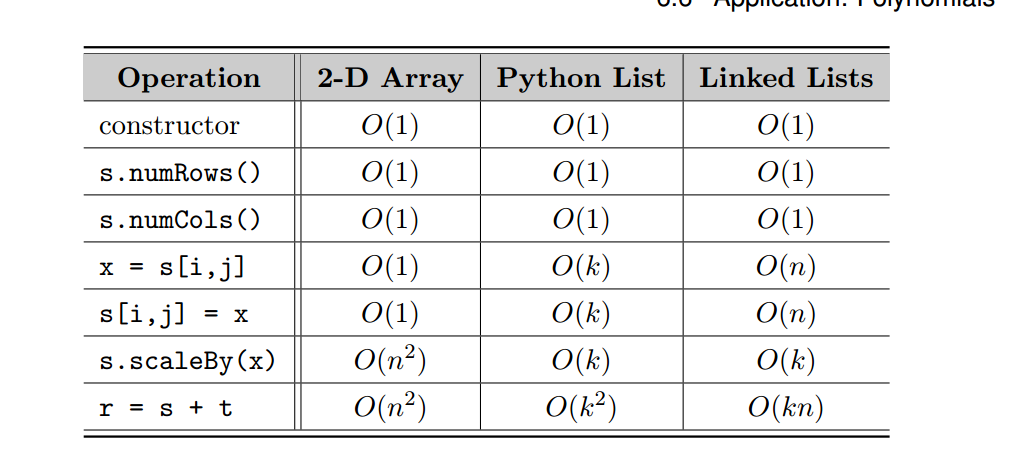

# Polynomials

In [22]:
# Implementation of the Polynomial ADT using a sorted linked list.
class Polynomial :
    # Create a new polynomial object.
    def __init__(self, degree = None, coefficient = None):
        if degree is None :
            self._polyHead = None
        else :
            self._polyHead = _PolyTermNode(degree, coefficient)
            self._polyTail = self._polyHead

    # Return the degree of the polynomial.
    def degree( self ):
        if self._polyHead is None :
            return -1
        else :
            return self._polyHead.degree

    # Return the coefficient for the term of the given degree.
    def __getitem__( self, degree ):
        assert self.degree() >= 0, "Operation not permitted on an empty polynomial."
        
        curNode = self._polyHead
        while curNode is not None and curNode.degree >= degree :
            curNode = curNode.next

        if curNode is None or curNode.degree != degree :
            return 0.0
        else :
            return curNode.coefficient

    # Evaluate the polynomial at the given scalar value.
    def evaluate( self, scalar ):
        assert self.degree() >= 0, "Only non-empty polynomials can be evaluated."
        result = 0.0
        curNode = self._polyHead
        while curNode is not None :
            result += curNode.coefficient * (scalar ** curNode.degree)
            curNode = curNode.next
        return result

    # Polynomial addition: newPoly = self + rhsPoly.
    def __add__( self, rhsPoly ):
        return

    # Polynomial subtraction: newPoly = self - rhsPoly.
    def __sub__( self, rhsPoly ):
        return

    # Polynomial multiplication: newPoly = self * rhsPoly.
    def __mul__( self, rhsPoly ):
        return

    # Helper method for appending terms to the polynomial.
    def _appendTerm( self, degree, coefficient ) :
        if coefficient != 0.0 :
            newTerm = _PolyTermNode( degree, coefficient )
            if self._polyHead is None :
                self._polyHead = newTerm
            else :
                self._polyTail.next = newTerm
            self._polyTail = newTerm

    # Class for creating polynomial term nodes used with the linked list.
class _PolyTermNode( object ):
    def __init__( self, degree, coefficient ):
        self.degree = degree
        self.coefficient = coefficient
        self.next = None

In [4]:
class Polynomial :
    
    def __add__( self, rhsPoly ):
        assert self.degree() >= 0 and rhsPoly.degree() >= 0,
        "Addition only allowed on non-empty polynomials." 

        newPoly = Polynomial()
        nodeA = self._termList
        nodeB = rhsPoly._termList

        # Add corresponding terms until one list is empty.
        while nodeA is not None and nodeB is not None :
            if nodeA.degree > nodeB.degree :
                degree = nodeA.degree
                value = nodeA.coefficient
                nodeA = nodeA.next
            elif listA.degree < listB.degree :
                degree = nodeB.degree
                value = nodeB.coefficient
                nodeB = nodeB.next
            else :
                degree = nodeA.degree
                value = nodeA.coefficient + nodeB.coefficient
                nodeA = nodeA.next
                nodeB = nodeB.next
            newPoly._appendTerm( degree, value )

        # If self list contains more terms append them.
        while nodeA is not None :
            newPoly._appendTerm( nodeA.degree, nodeA.coefficient )
            nodeA = nodeA.next

        # Or if rhs contains more terms append them.
        while nodeB is not None :
            newPoly._appendTerm( nodeB.degree, nodeB.coefficient )
            nodeB = nodeB.next

        return newPoly


SyntaxError: invalid syntax (<string>, line 4)

In [25]:
class Polynomial :

    def multiply( self, rhsPoly ):
        assert self.degree() >= 0 and rhsPoly.degree() >= 0,\
        "Multiplication only allowed on non-empty polynomials."
       
        # Create a new polynomial by multiplying rhsPoly by the first term.
        node = self._polyHead
        newPoly = rhsPoly._termMultiply( node )

        # Iterate through the remaining terms of the poly computing the
        # product of the rhsPoly by each term.
        node = node.next
        while node is not None :
            tempPoly = rhsPoly._termMultiply( node )
            newPoly = newPoly.add( tempPoly )
            node = node.next

        return newPoly

    # Helper method for creating a new polynomial from multiplying an
    # existing polynomial by another term.
    def _termMultiply( self, termNode ):
        newPoly = Polynomial()

        # Iterate through the terms and compute the product of each term and
        # the term in termNode.
        curr=self._polyHead
        #curr = curr.next
        while curr is not None :
            # Compute the product of the term.
            newDegree = curr.degree + termNode.degree
            newCoeff = curr.coefficient * termNode.coefficient

            # Append it to the new polynomial.
            newPoly._appendTerm( newDegree, newCoeff )

            # Advance the current pointer.
            curr = curr.next
        return newPoly